# 线性回归练习题

在这个练习中，我们使用一个Kaggle竞赛中提供的共享单车的数据集：[Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/data)。
该数据集包含2011到2012年Capital Bikeshare系统中记录的每日每小时单车的租赁数，以及相应的季节和气候等信息。

数据列：
* **datetime** - hourly date + timestamp  
* **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* **holiday** - whether the day is considered a holiday
* **workingday** - whether the day is neither a weekend nor holiday
* **weather** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy；2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist；3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds；4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* **temp** - temperature in Celsius
* **atemp** - "feels like" temperature in Celsius
* **humidity** - relative humidity
* **windspeed** - wind speed
* **casual** - number of non-registered user rentals initiated
* **registered** - number of registered user rentals initiated
* **count** - number of total rentals

## 第一步：读入数据

In [2]:
# read the data and set the datetime as the index
import pandas as pd

bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)

In [3]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 第二步：可视化数据

* 用matplotlib画出温度“temp”和自行车租赁数“count”之间的散点图；
* 用seborn画出温度“temp”和自行车租赁数“count”之间带线性关系的散点图（提示：使用seaborn中的lmplot绘制）

Text(0, 0.5, 'count of bikes')

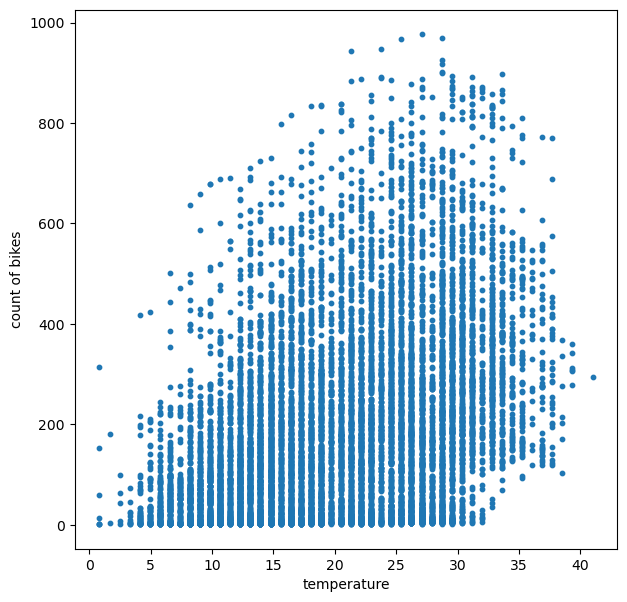

In [4]:
# matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(1, figsize=(7,7))
plt.scatter(bikes['temp'], bikes['count'], marker='o', s=10)
plt.xlabel("temperature")
plt.ylabel("count of bikes")


d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


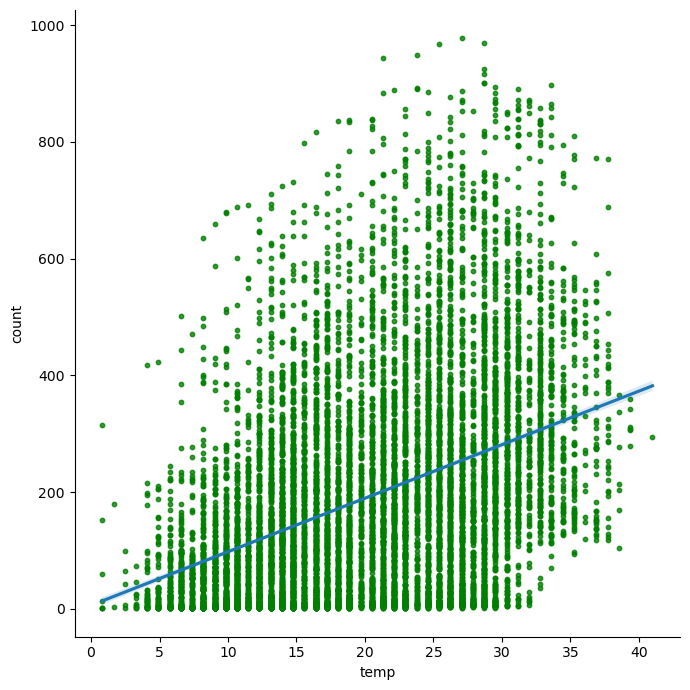

In [5]:
# seaborn
import seaborn as sns

data = bikes[['temp','count']]
sns.lmplot(x='temp', y='count', data=data, height=7, aspect=1, scatter_kws={'s':10, 'color':'green', 'alpha':.8})

## 第三步：一元线性回归

用温度预测自行车租赁数

In [6]:
# create X and y
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = np.array(bikes['temp']).reshape(-1,1)
y = bikes['count']


In [7]:
# import, instantiate, fit
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [8]:
# print the coefficients
print("linreg.coef_: {}".format(linreg.coef_))

linreg.coef_: [9.13929139]


## 第四步：探索多个特征

In [9]:
# explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']


for feature in feature_cols:
    X = np.array(bikes[feature]).reshape(-1,1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg.fit(X_train, y_train)

    print(feature, "linreg.coef_: {}".format(linreg.coef_))



temp linreg.coef_: [9.04436388]
season linreg.coef_: [25.56470882]
weather linreg.coef_: [-34.87431167]
humidity linreg.coef_: [-2.98010528]


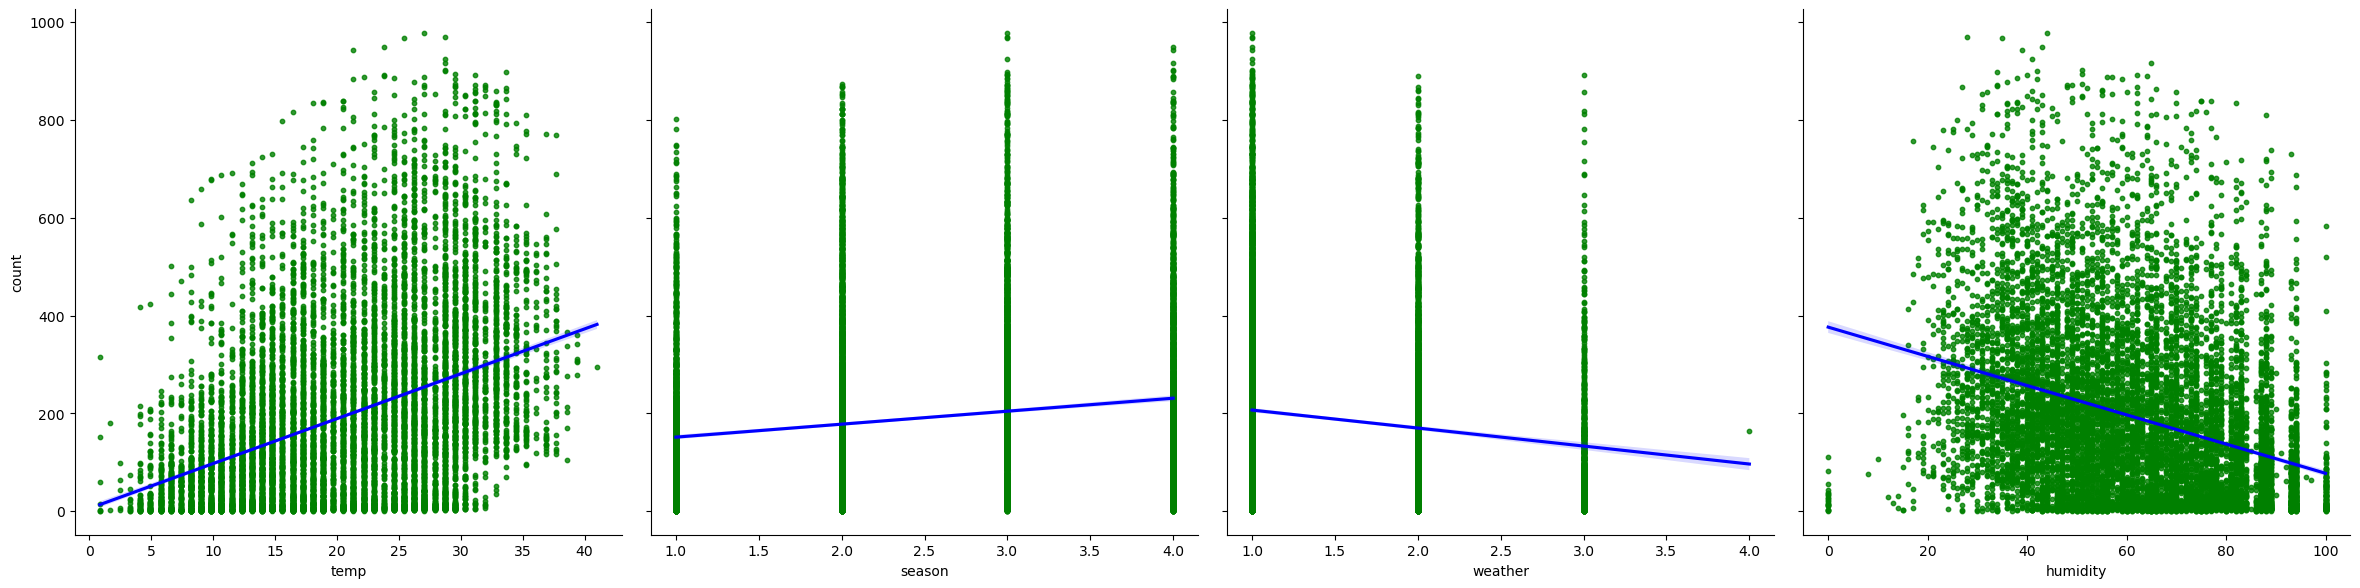

In [10]:
# using seaborn, draw multiple scatter plots between each feature in feature_cols and 'count'
data = bikes[['temp', 'season', 'weather', 'humidity', 'count']]

g = sns.PairGrid(data, x_vars=['temp', 'season', 'weather', 'humidity'], y_vars='count', height=6, aspect=1)

g.map(sns.regplot, scatter_kws={'s':10, 'color': 'green'}, line_kws={'color': 'blue'})

plt.show()


In [11]:
# correlation matrix (ranges from 1 to -1)
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<Axes: >

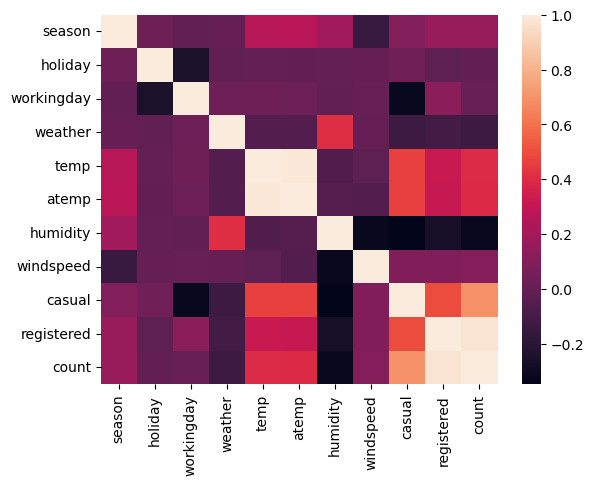

In [12]:
sns.heatmap(bikes.corr())

### 用'temp', 'season', 'weather', 'humidity'四个特征预测单车租赁数'count'

In [13]:
# create X and y
X = bikes[['temp', 'season', 'weather', 'humidity']]
y = bikes['count']

In [14]:
# import, instantiate, fit
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [15]:
# print the coefficients
print(feature, "linreg.coef_: {}".format(linreg.coef_))

humidity linreg.coef_: [ 7.85025381 22.21397542  7.4708328  -3.15621939]


### 使用train/test split和RMSE来比较多个不同的模型

In [16]:
# compare different sets of features
feature_cols1 = ['temp', 'season', 'weather', 'humidity']
feature_cols2 = ['temp', 'season', 'weather']
feature_cols3 = ['temp', 'season', 'humidity']

from sklearn import metrics
col_list = [feature_cols1, feature_cols2, feature_cols3]
for feature_cols in col_list:
    X = bikes[feature_cols]
    y = bikes['count']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
    lrg = LinearRegression()
    lrg.fit(X_train, y_train)
    y_pred = lrg.predict(X_test)
    print(feature_cols, "(RMSE): {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))


['temp', 'season', 'weather', 'humidity'] (RMSE): 155.35419981754575
['temp', 'season', 'weather'] (RMSE): 165.0214964013256
['temp', 'season', 'humidity'] (RMSE): 155.4208982157535


## 补充：处理类别特征

有两种类别特征：

- **有序类别值：** 转换成相应的数字值(例如: small=1, medium=2, large=3)
- **无序类别值：** 使用dummy encoding (0/1编码)

此数据集中的类别特征有：

- **有序类别值：** weather (已经被编码成相应的数字值1,2,3,4)
- **无序类别值：** season (需要进行dummy encoding), holiday (已经被dummy encoded), workingday (已经被dummy encoded)

In [18]:
# create dummy variables
season_dummies = pd.get_dummies(bikes.season, prefix='season')

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,False,False,True,False
2012-03-18 04:00:00,True,False,False,False
2012-10-14 17:00:00,False,False,False,True
2011-04-04 15:00:00,False,True,False,False
2012-12-11 02:00:00,False,False,False,True


我们只需要 **三个 dummy 变量 (不是四个)** （为什么？）, 所以可以删除第一个dummy变量。

In [19]:
# drop the first column
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,False,True,False
2012-03-18 04:00:00,False,False,False
2012-10-14 17:00:00,False,False,True
2011-04-04 15:00:00,True,False,False
2012-12-11 02:00:00,False,False,True


In [20]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
bikes = pd.concat([bikes, season_dummies], axis=1)

# print 5 random rows
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,False,True,False
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,False,False,False
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,False,False,True
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,True,False,False
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,False,False,True


### 将编码成的dummy变量加入回归模型的特征，预测单车租赁数，并和前面的模型进行比较

In [21]:
# include dummy variables for season in the model
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_cols]
y = bikes['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lrg.fit(X_train, y_train)
y_pred = lrg.predict(X_test)
print(feature_cols, "(RMSE): {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))


['temp', 'season_2', 'season_3', 'season_4', 'humidity'] (RMSE): 154.27800312889627


### 从前面多个模型中选出一个最佳的模型，添加多项式特征（degree=2），然后分别使用Ridge、Lasso和ElasticNet三种模型做预测，并比较。

In [22]:
# 添加多项式特征，degree=2
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)


In [23]:
# Ridge regression model
from sklearn.linear_model import Ridge, Lasso

rr = Ridge(alpha=0.001)
rr.fit(X_train_poly, y_train)
y_pred_rr = rr.predict(X_test_poly)
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred_rr)))


Root mean square error (RMSE): 152.29954589083513


In [28]:
# Lasso regression model
lassor = Lasso(alpha=0.001, max_iter=10000)
lassor.fit(X_train_poly, y_train)
y_pred_lr = lassor.predict(X_test_poly)
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)))

Root mean square error (RMSE): 152.29978293725662


In [29]:
# ElasticNet regression model
from sklearn.linear_model import ElasticNet
ent = ElasticNet(alpha=100)
ent.fit(X_train_poly, y_train)
y_pred_ent = ent.predict(X_test_poly)
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred_ent)))

Root mean square error (RMSE): 155.64561239605675
